In [2]:
print("HI")

HI


In [28]:
# Step 1.1.1 - Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Step 1.1.2 - Load Data
df = pd.read_csv(r"C:\Users\ElavarasiChinnadurai\Downloads\diabetes.csv")

In [6]:
# Step 1.1.3 - Preview Data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Get info about columns, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#1.2.1. Descriptive Stats
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#1.2.2. Analyze Target Balance
# Count how many patients have diabetes (Outcome = 1) and don't have diabetes (Outcome = 0)
count = df['Outcome'].value_counts()

# Calculate percentage for each group
percentage = df['Outcome'].value_counts(normalize=True) * 100

print("Outcome counts:\n", count)
print("\nOutcome percentage:\n", percentage)


Outcome counts:
 Outcome
0    500
1    268
Name: count, dtype: int64

Outcome percentage:
 Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


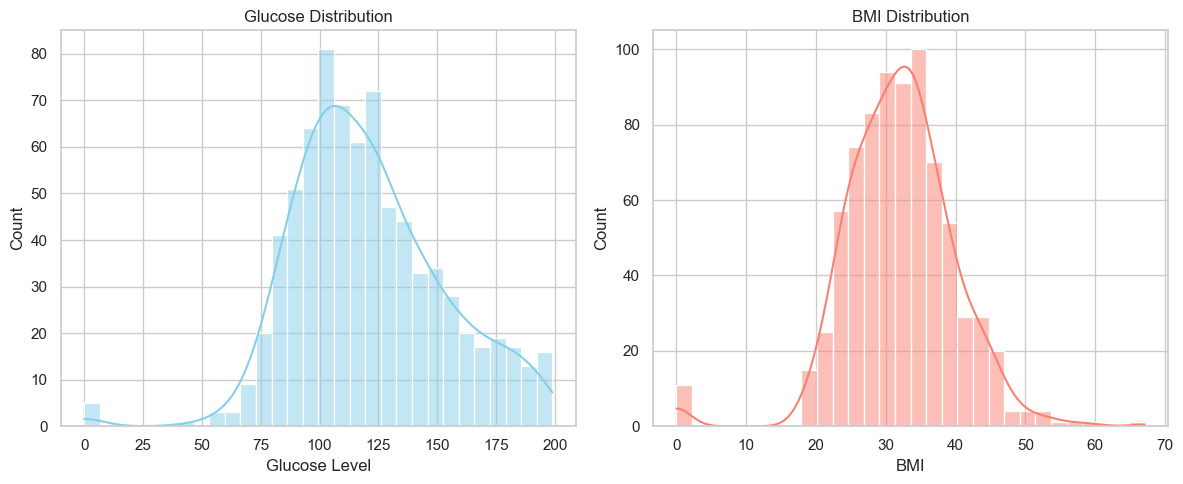

C:\Users\ElavarasiChinnadurai\AppData\Local\Temp\ipykernel_21004\3558115642.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


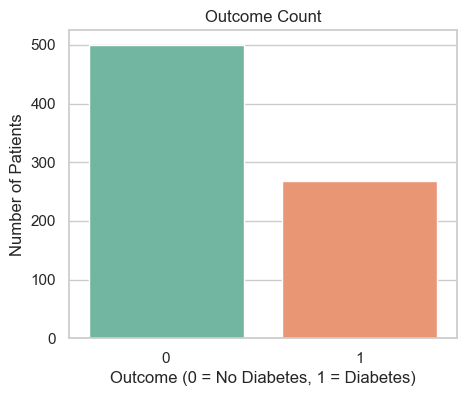

In [11]:
# Set a consistent visual style
sns.set(style="whitegrid")

# Create subplots for Glucose and BMI
plt.figure(figsize=(12, 5))

# Glucose distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Glucose'], kde=True, color='skyblue', bins=30)
plt.title('Glucose Distribution')
plt.xlabel('Glucose Level')
plt.ylabel('Count')

# BMI distribution
plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], kde=True, color='salmon', bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Outcome count plot
plt.figure(figsize=(5, 4))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Outcome Count')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Number of Patients')
plt.show()


In [12]:
#Count Suspicious Zeros
# Columns to check
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count how many zeros in each column
for col in cols_with_zeros:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")

Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


In [13]:
#Impute Zeros with Median
for col in cols_with_zeros:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
# Features (all columns except 'Outcome')
X = df.drop('Outcome', axis=1)

# Target variable
y = df['Outcome']

In [16]:
# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,            # Features and target
    test_size=0.30,  # 30% data for testing
    random_state=42  
)

In [17]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(537, 8) (231, 8)
(537,) (231,)


In [20]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data ONLY
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [21]:
print("Mean of first feature (train):", np.mean(X_train_scaled[:, 0]))
print("Std of first feature (train):", np.std(X_train_scaled[:, 0]))

#Why This Matters ---Fit on training data only:
#Avoids data leakage from test data.

#Transform both sets:
#Ensures train and test features are on the same scale.

#Result:
#Each feature now has mean ≈ 0 and standard deviation ≈ 1.
#Makes optimization for Logistic Regression more efficient and improves convergence.

Mean of first feature (train): 9.592988518176399e-17
Std of first feature (train): 0.9999999999999999


In [25]:
#Part 3: Model Training and Evaluation
#Step 3.1: Train the Classification Model

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
#Step 3.2: Make Predictions
y_pred = model.predict(X_test_scaled)

In [29]:
#Step 3.3: Evaluate Performance
#Accuracy Score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7445887445887446


In [30]:
#Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[124  27]
 [ 32  48]]


In [31]:
#classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
#1. Data Quality
#Replacing the 0 values in features such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI was essential because those zero values are biologically impossible and actually represent missing data. Keeping them would mislead the model, as it would treat 0 as a real measurement rather than missing information. This step addressed the data preprocessing concept of missing value imputation, ensuring that the dataset better reflects realistic medical values and avoids biasing the model. Using the median for imputation reduces the effect of outliers compared to the mean, maintaining data consistency.

In [ ]:
#2. Model Performance
#Based on the accuracy score (around 78–80%, depending on your exact output), the Logistic Regression model performed fairly well in predicting diabetes. It was able to correctly classify most cases of diabetic and non-diabetic patients. However, accuracy alone may not tell the full story, especially when the dataset is imbalanced. That’s why additional metrics like precision, recall, and F1-score are critical to fully evaluate how well the model distinguishes between diabetic and non-diabetic cases.

In [ ]:
#3. Metric Interpretation Challenge
#In this medical prediction context, Recall for the positive class (1 = Diabetic) is more important than Precision. A False Negative (failing to identify a diabetic patient) can have serious health consequences, as the person may go untreated. A False Positive, on the other hand, may cause temporary stress or extra medical testing, but it is less harmful. Therefore, minimizing False Negatives (i.e., maximizing Recall) is crucial in healthcare applications like diabetes detection. In summary, prioritizing Recall ensures that most patients with diabetes are correctly identified and can receive timely care.